In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from IPython.display import display
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
def read_csv_files_from_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []
    # Get a list of files in the folder
    file_list = os.listdir(folder_path)
    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .csv extension
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [3]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [4]:
results = read_csv_files_from_folder('results/')
results.replace({'ftl_mlp_initializer': 'FTL', 'adversarial_debiasing_initializer': 'AD', 'gerry_fair_classifier_initializer': 'GFC', 'prejudice_remover_initializer': 'PR', 'simple_mlp_initializer': 'MLP'}, inplace=True)
results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit', 'bank_dataset_reader': 'Bank Marketing'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [5]:
display(results)

,Unnamed: 0,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity
0,3,German Credit,PR,mcc_parity,-0.077859,0.545000,0.000000,0.070884,0.077859,0.056402
1,7,German Credit,PR,mcc_odds,-0.129086,0.620000,0.000000,0.129086,0.161000,0.084427
2,11,German Credit,PR,mcc_opportunity,-0.053052,0.575000,0.000000,0.115271,0.135058,0.053052
3,15,German Credit,PR,acc_parity,0.392316,0.555000,0.000000,0.159695,0.162684,0.195652
4,19,German Credit,PR,acc_odds,0.469445,0.555000,0.000000,0.085555,0.021354,0.117521
...,...,...,...,...,...,...,...,...,...,...
1804,1734,Bank Marketing,FTL,mcc_odds,0.512368,0.892752,0.567577,0.055209,0.064039,0.096869
1805,1739,Bank Marketing,FTL,mcc_opportunity,0.439395,0.787963,0.501721,0.423663,0.696893,0.062327
1806,1744,Bank Marketing,FTL,acc_parity,0.885779,0.893244,0.378632,0.047285,0.007465,0.079024
1807,1749,Bank Marketing,FTL,acc_odds,0.823758,0.895048,0.393785,0.071289,0.012262,0.137643


In [6]:
datasets = results['dataset'].unique().tolist()
datasets

['German Credit', 'Bank Marketing', 'Adult Income', 'Compas Recidivism']

In [7]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [8]:
fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}
fitness_rules_abvr = {
    'mcc_parity': 'Max(MCC - Stat. Parity)',
    'mcc_opportunity': 'Max(MCC - Eq. Odds)',
    'mcc_odds': 'Max(MCC - Eq. Opp.)',
    'acc_parity': 'Max(Acc - Stat. Parity)',
    'acc_opportunity': 'Max(Acc - Eq. Odds)',
    'acc_odds':  'Max(Acc - Eq. Opp.)'
}

In [9]:
results['Performance'] = 0
results['Fairness'] = 0
results['Fitness Rule'] = ''
for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
    results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule Abvr'] = fitness_rules_abvr[fitness_rule]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule'] = 'Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule]

display(results)

,Unnamed: 0,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity,Performance,Fairness,Fitness Rule,Fitness Rule Abvr
0,3,German Credit,PR,mcc_parity,-0.077859,0.545000,0.000000,0.070884,0.077859,0.056402,0.000000,0.077859,Max(Mathew Correlation - Statistical Parity),Max(MCC - Stat. Parity)
1,7,German Credit,PR,mcc_odds,-0.129086,0.620000,0.000000,0.129086,0.161000,0.084427,0.000000,0.129086,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
2,11,German Credit,PR,mcc_opportunity,-0.053052,0.575000,0.000000,0.115271,0.135058,0.053052,0.000000,0.053052,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
3,15,German Credit,PR,acc_parity,0.392316,0.555000,0.000000,0.159695,0.162684,0.195652,0.555000,0.162684,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
4,19,German Credit,PR,acc_odds,0.469445,0.555000,0.000000,0.085555,0.021354,0.117521,0.555000,0.085555,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,1734,Bank Marketing,FTL,mcc_odds,0.512368,0.892752,0.567577,0.055209,0.064039,0.096869,0.567577,0.055209,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
1805,1739,Bank Marketing,FTL,mcc_opportunity,0.439395,0.787963,0.501721,0.423663,0.696893,0.062327,0.501721,0.062327,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
1806,1744,Bank Marketing,FTL,acc_parity,0.885779,0.893244,0.378632,0.047285,0.007465,0.079024,0.893244,0.007465,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
1807,1749,Bank Marketing,FTL,acc_odds,0.823758,0.895048,0.393785,0.071289,0.012262,0.137643,0.895048,0.071289,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)


In [10]:
methods = ['MLP', 'FTL', 'AD', 'PR', 'GFC']

/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


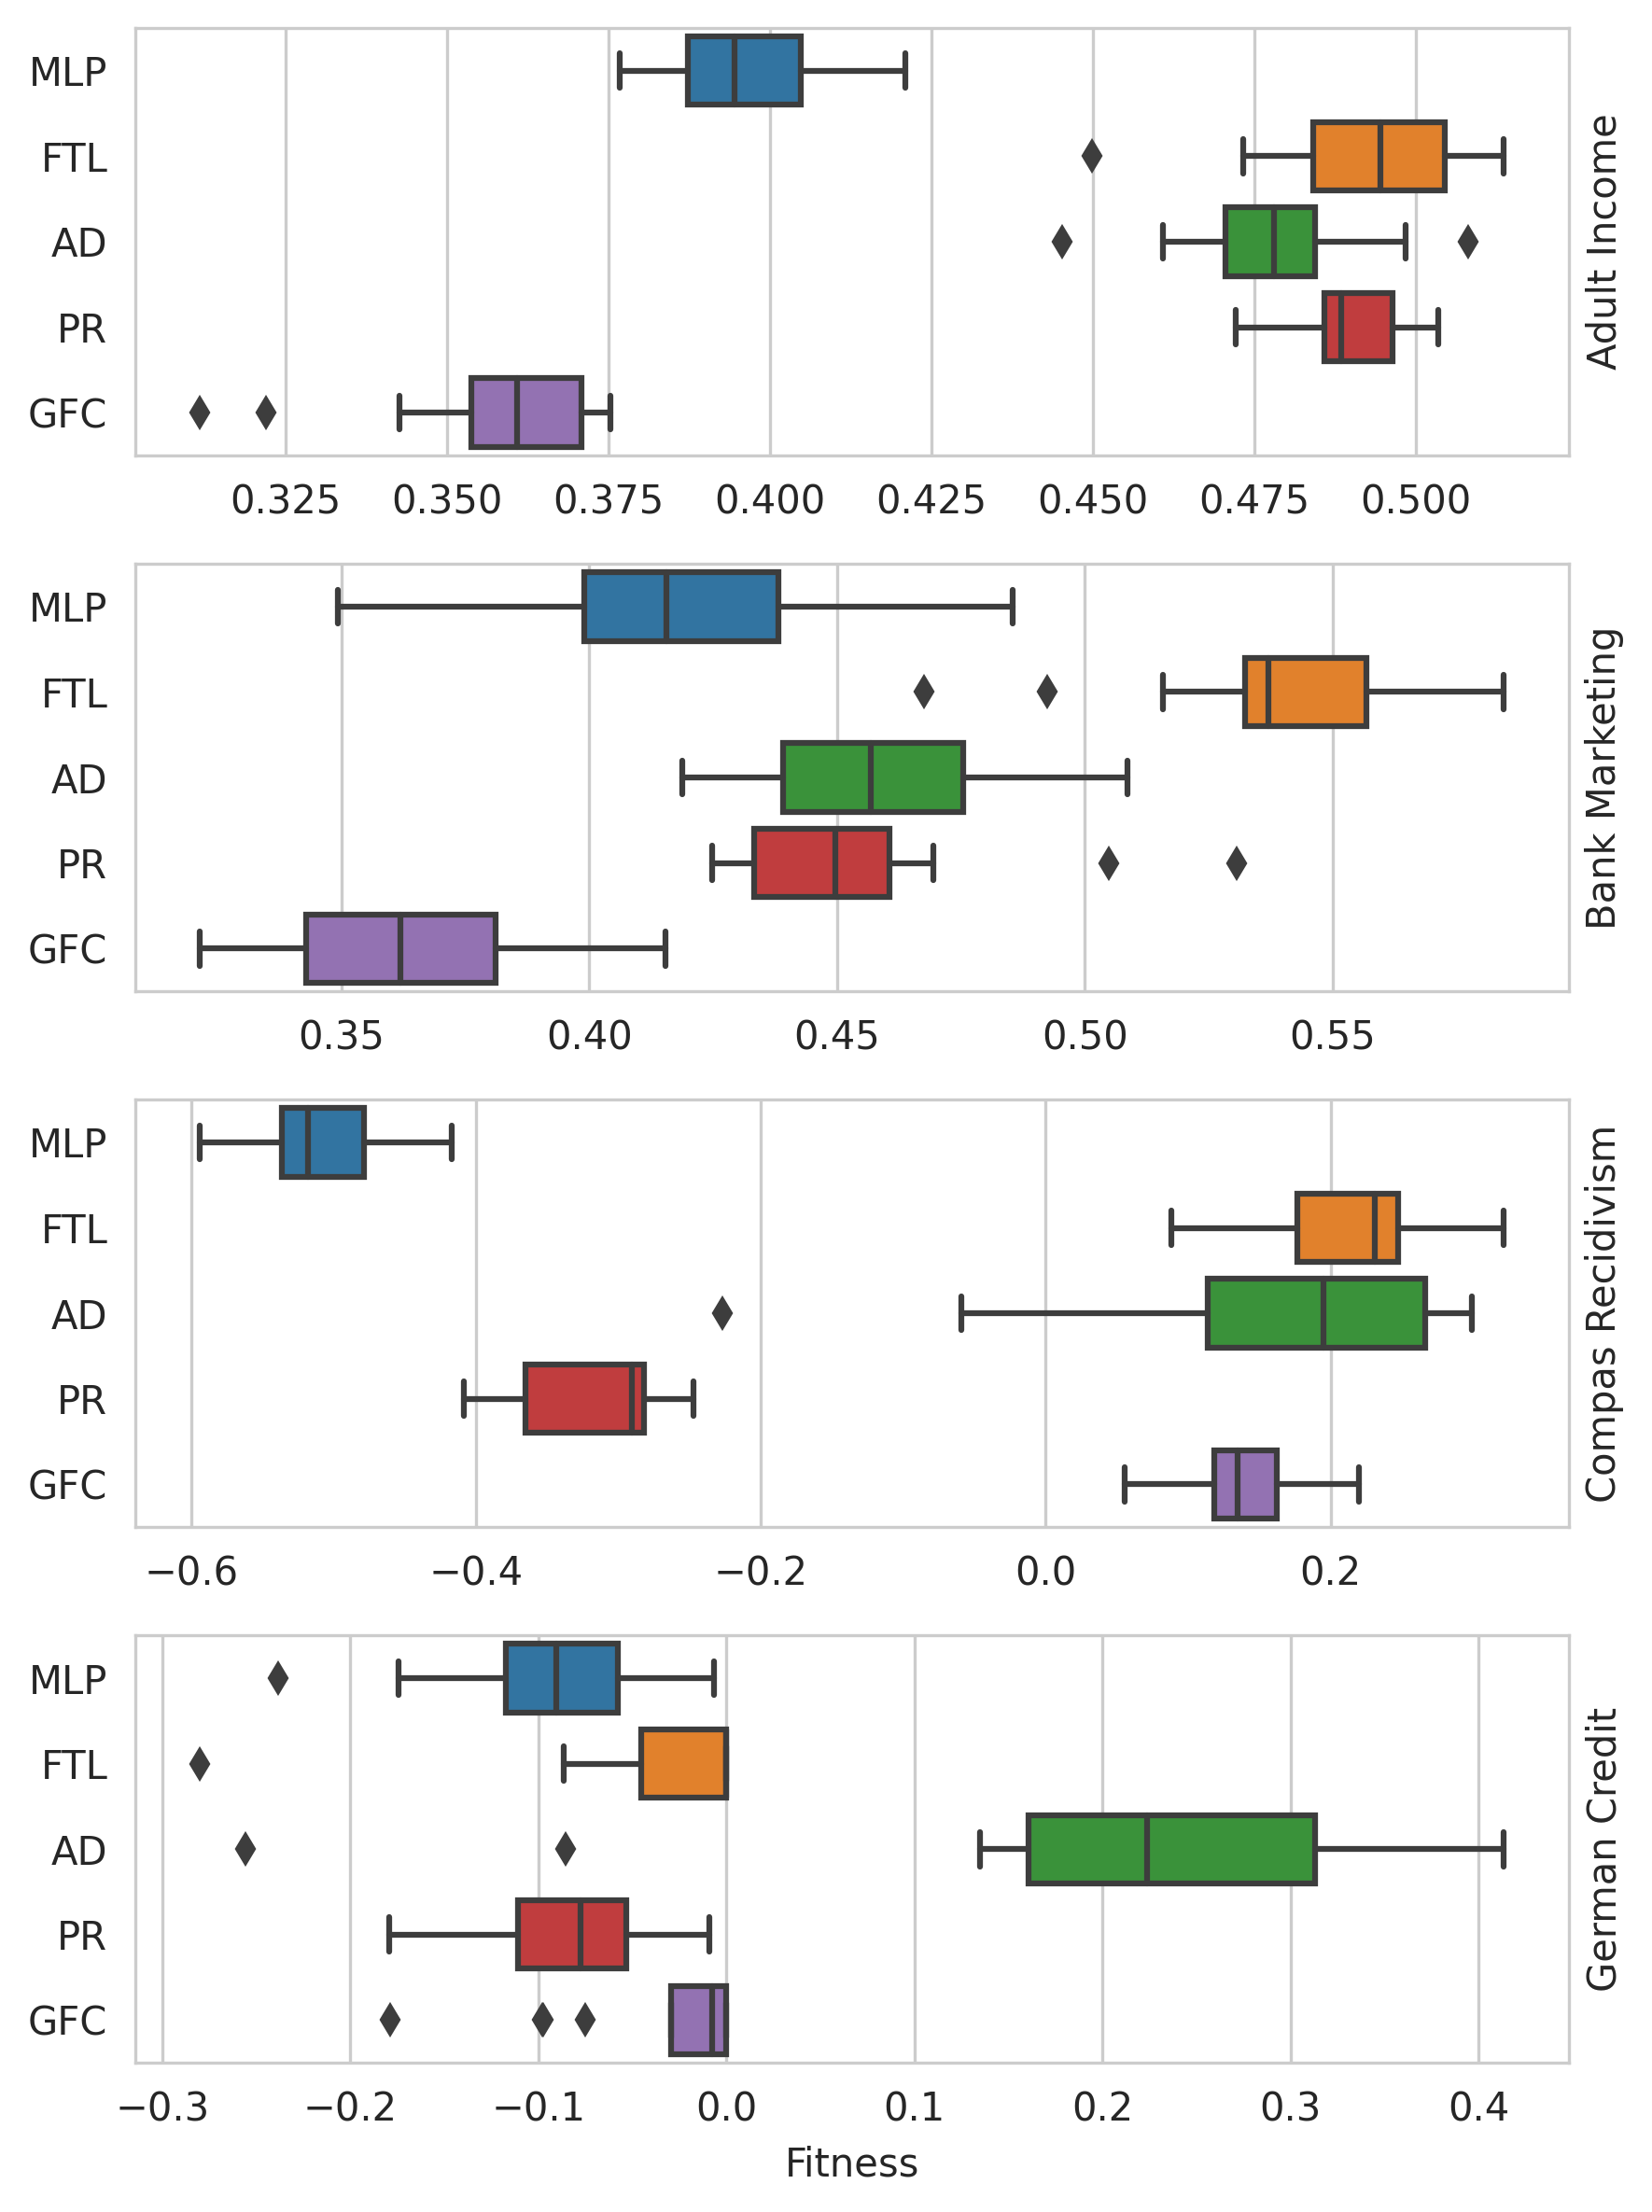

/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


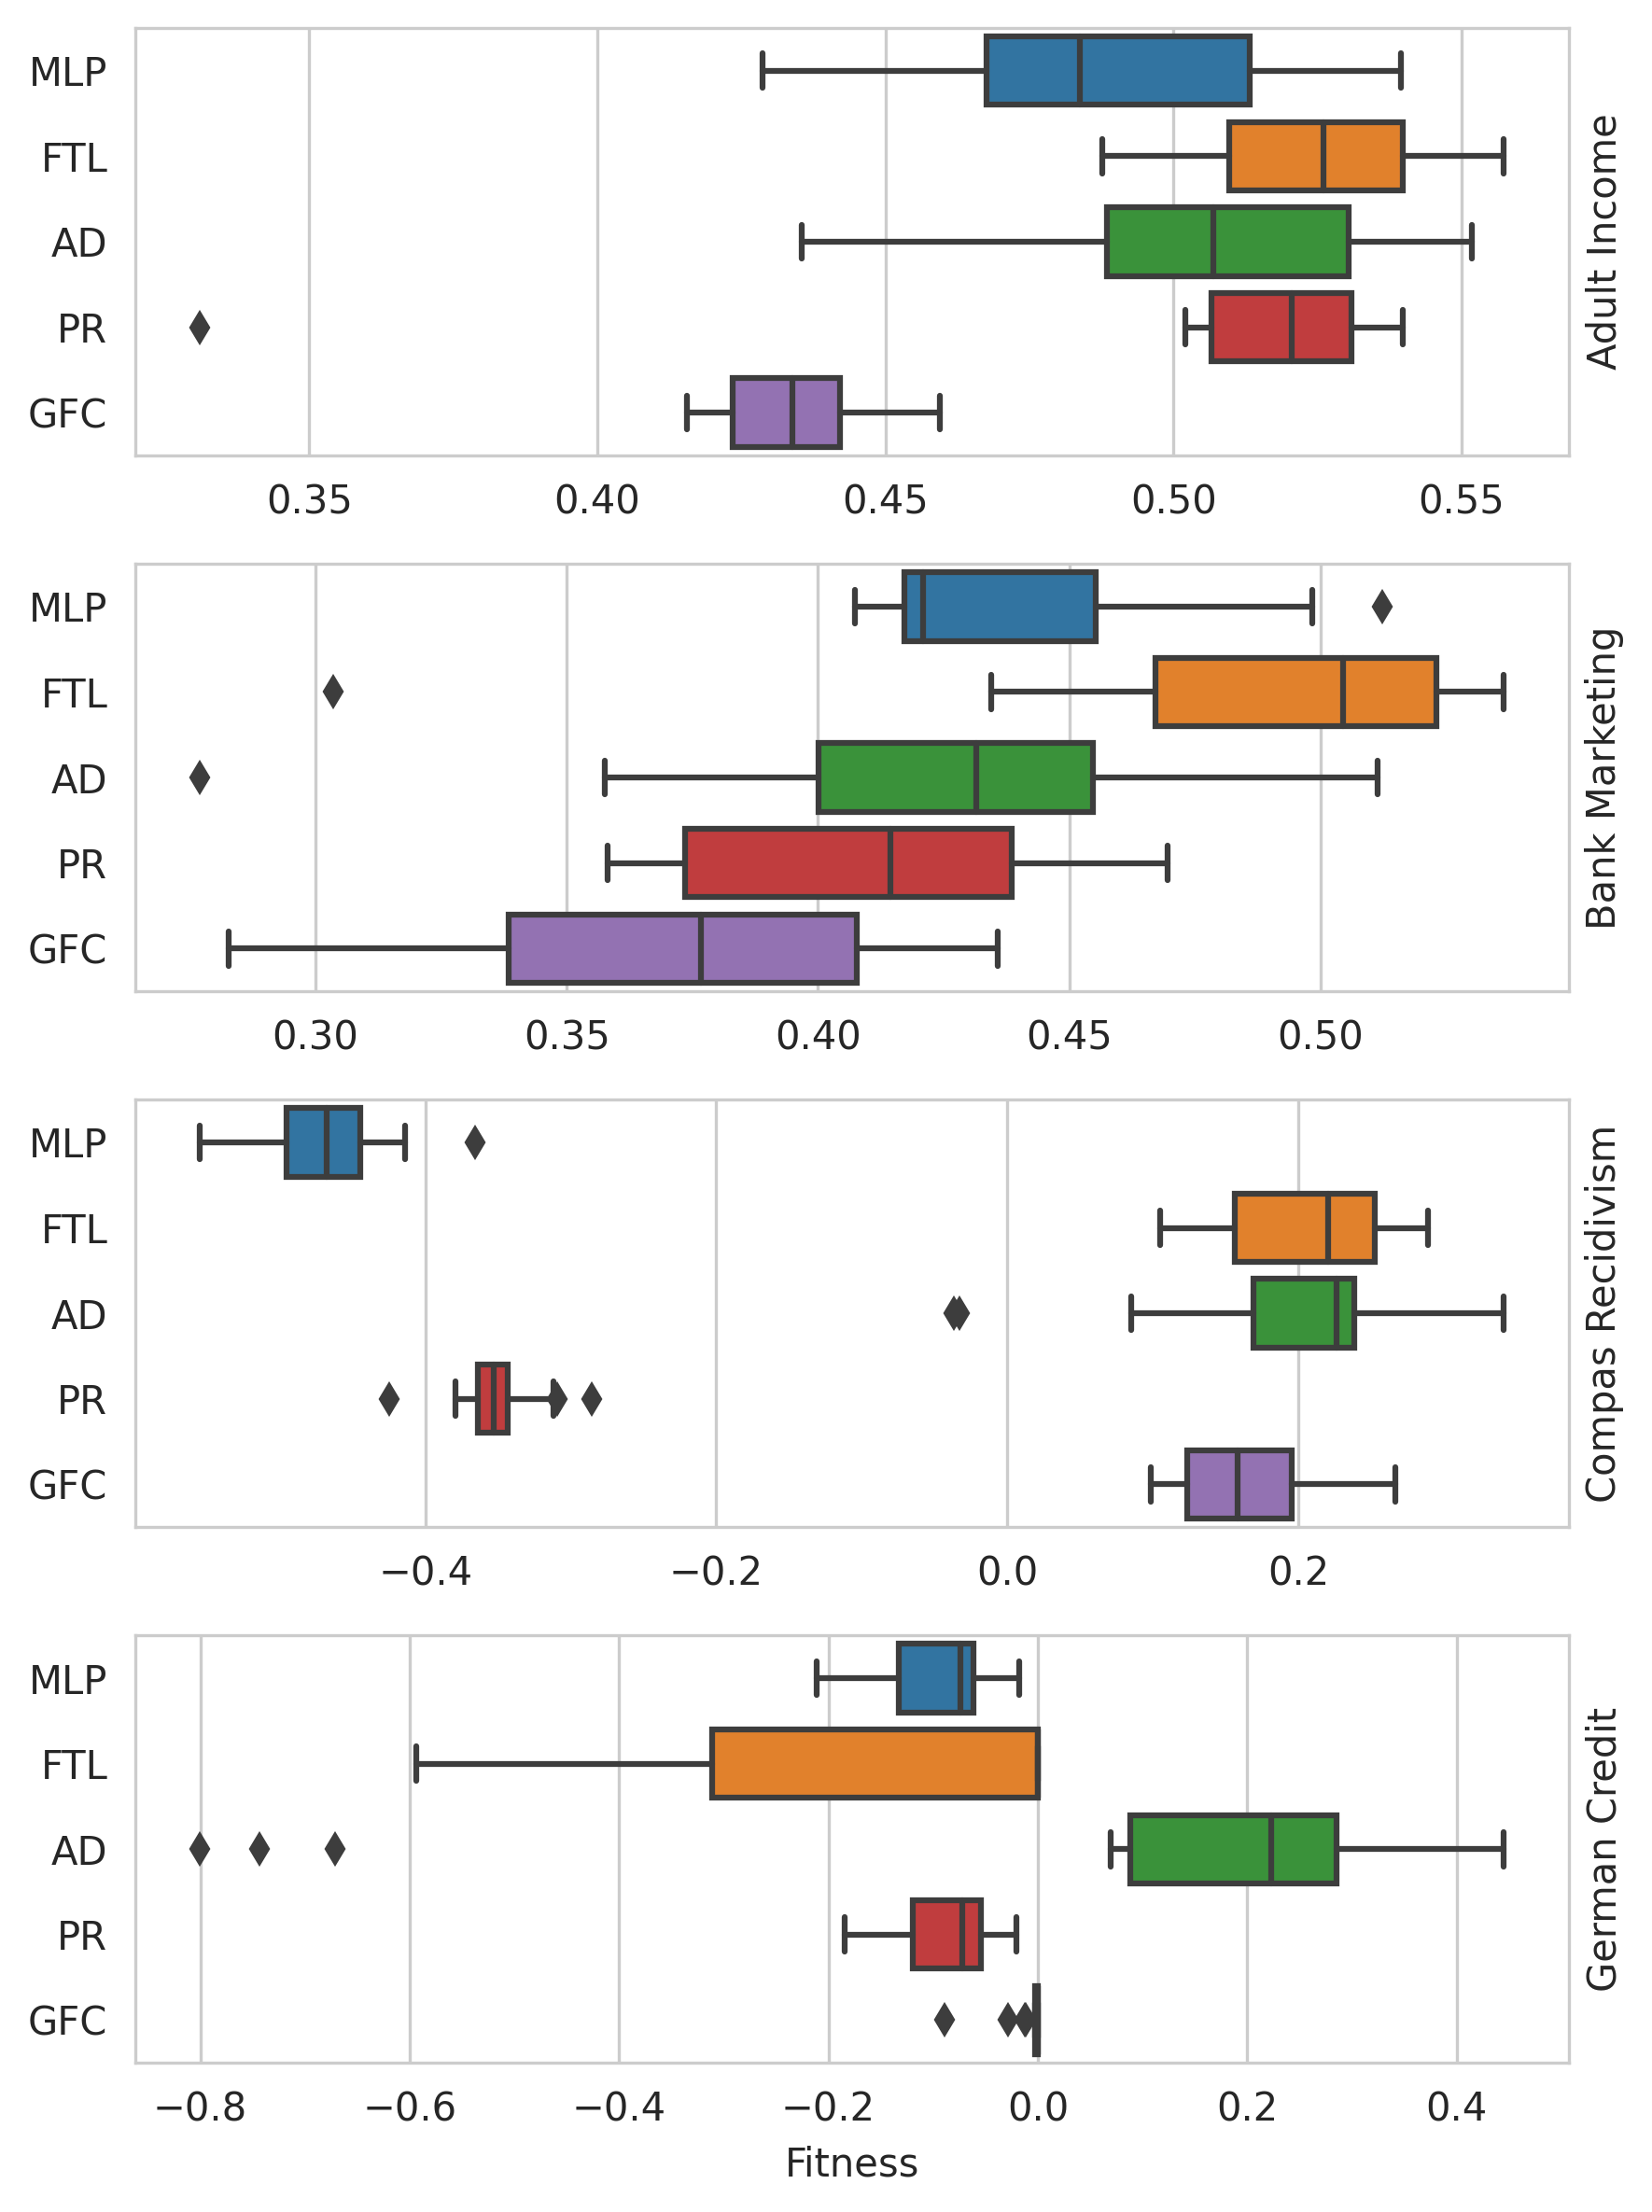

/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


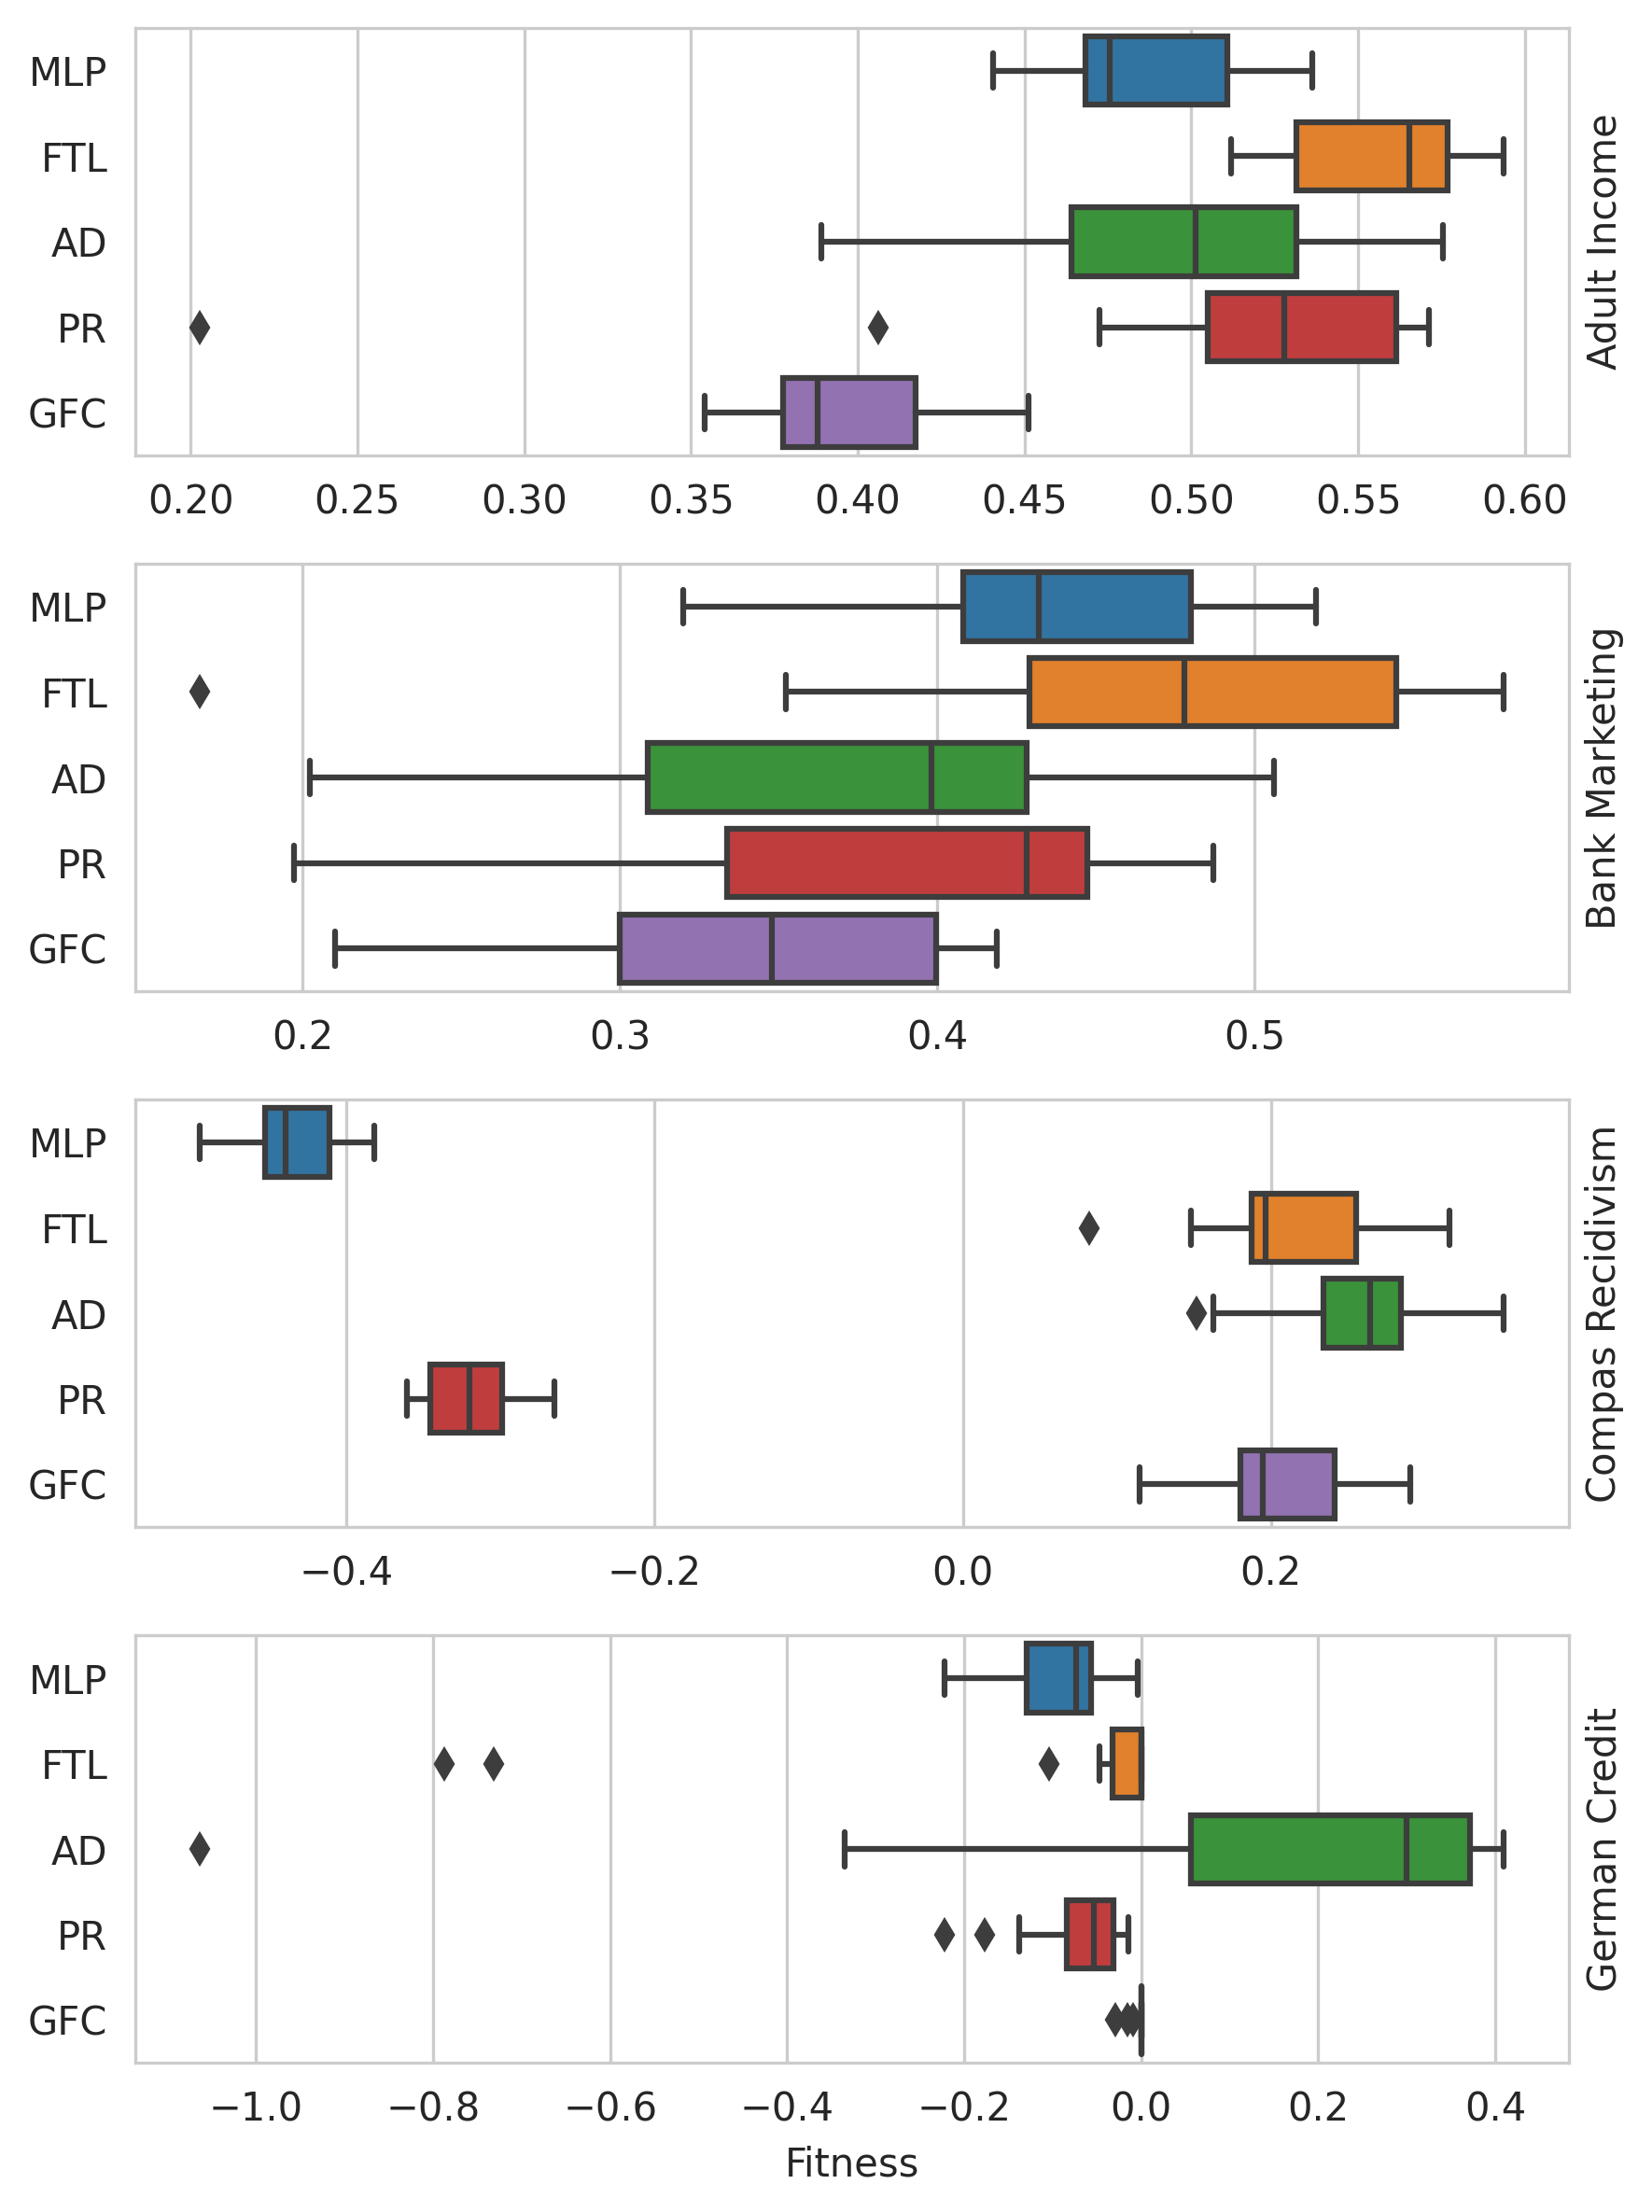

/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


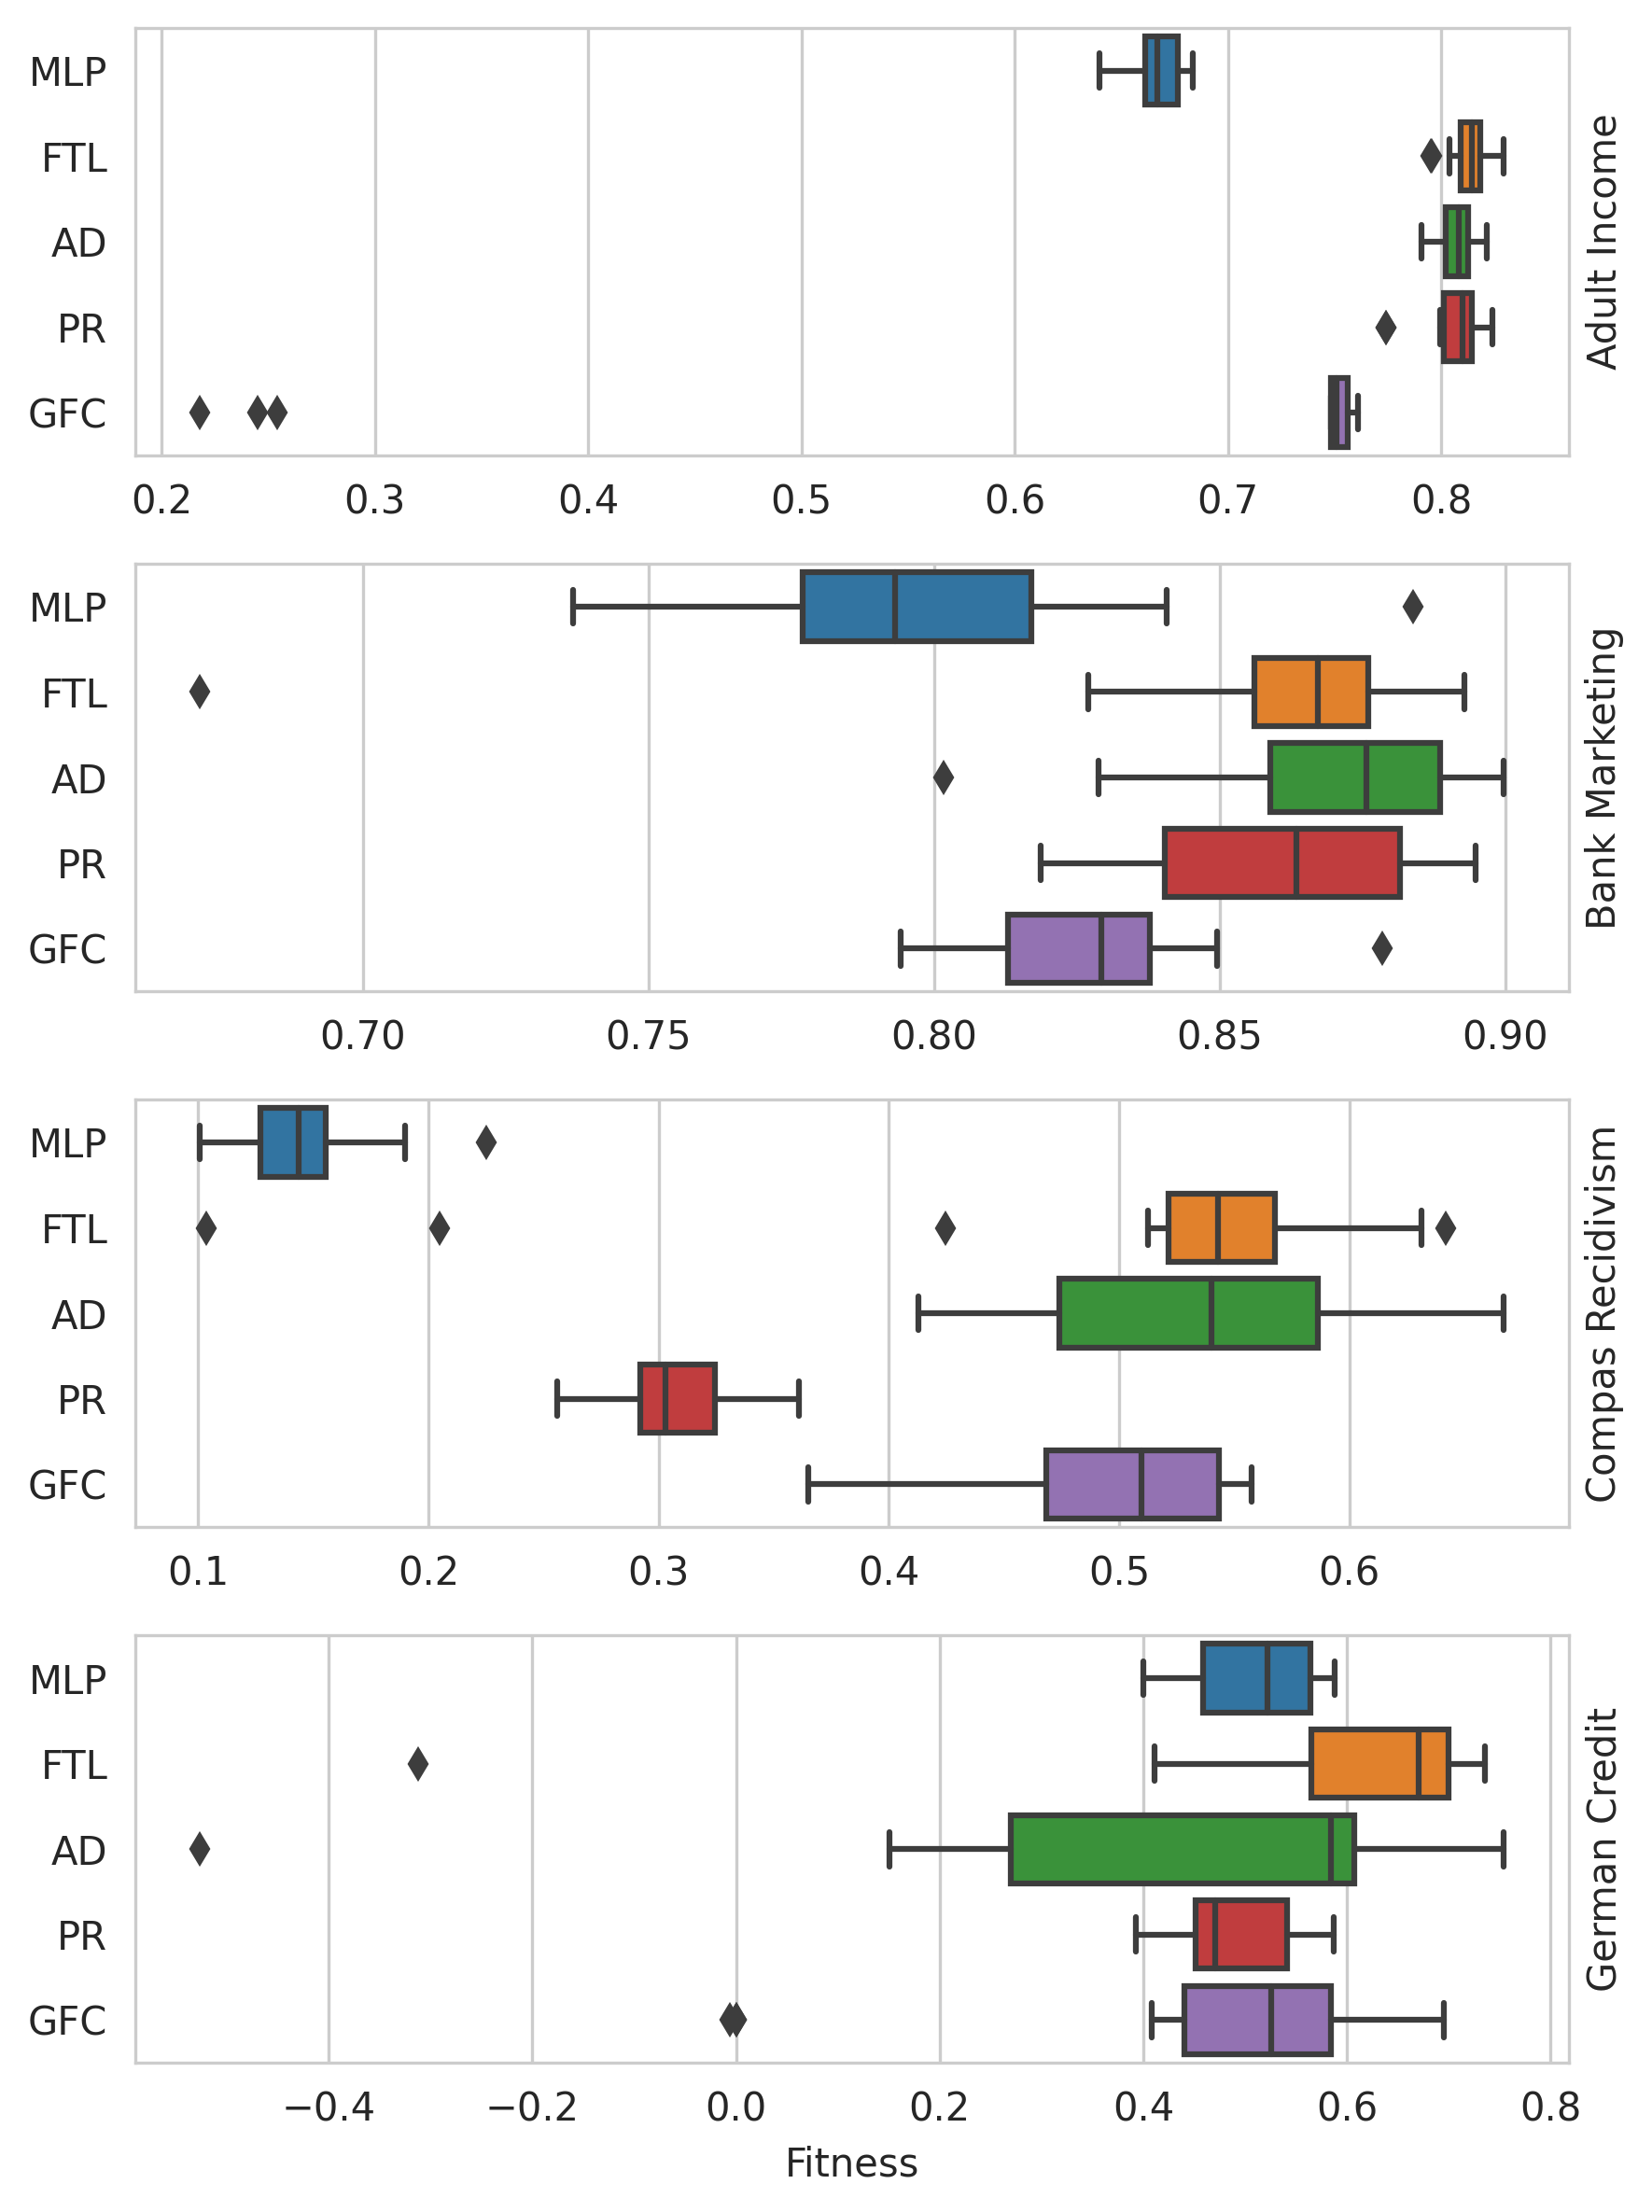

/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


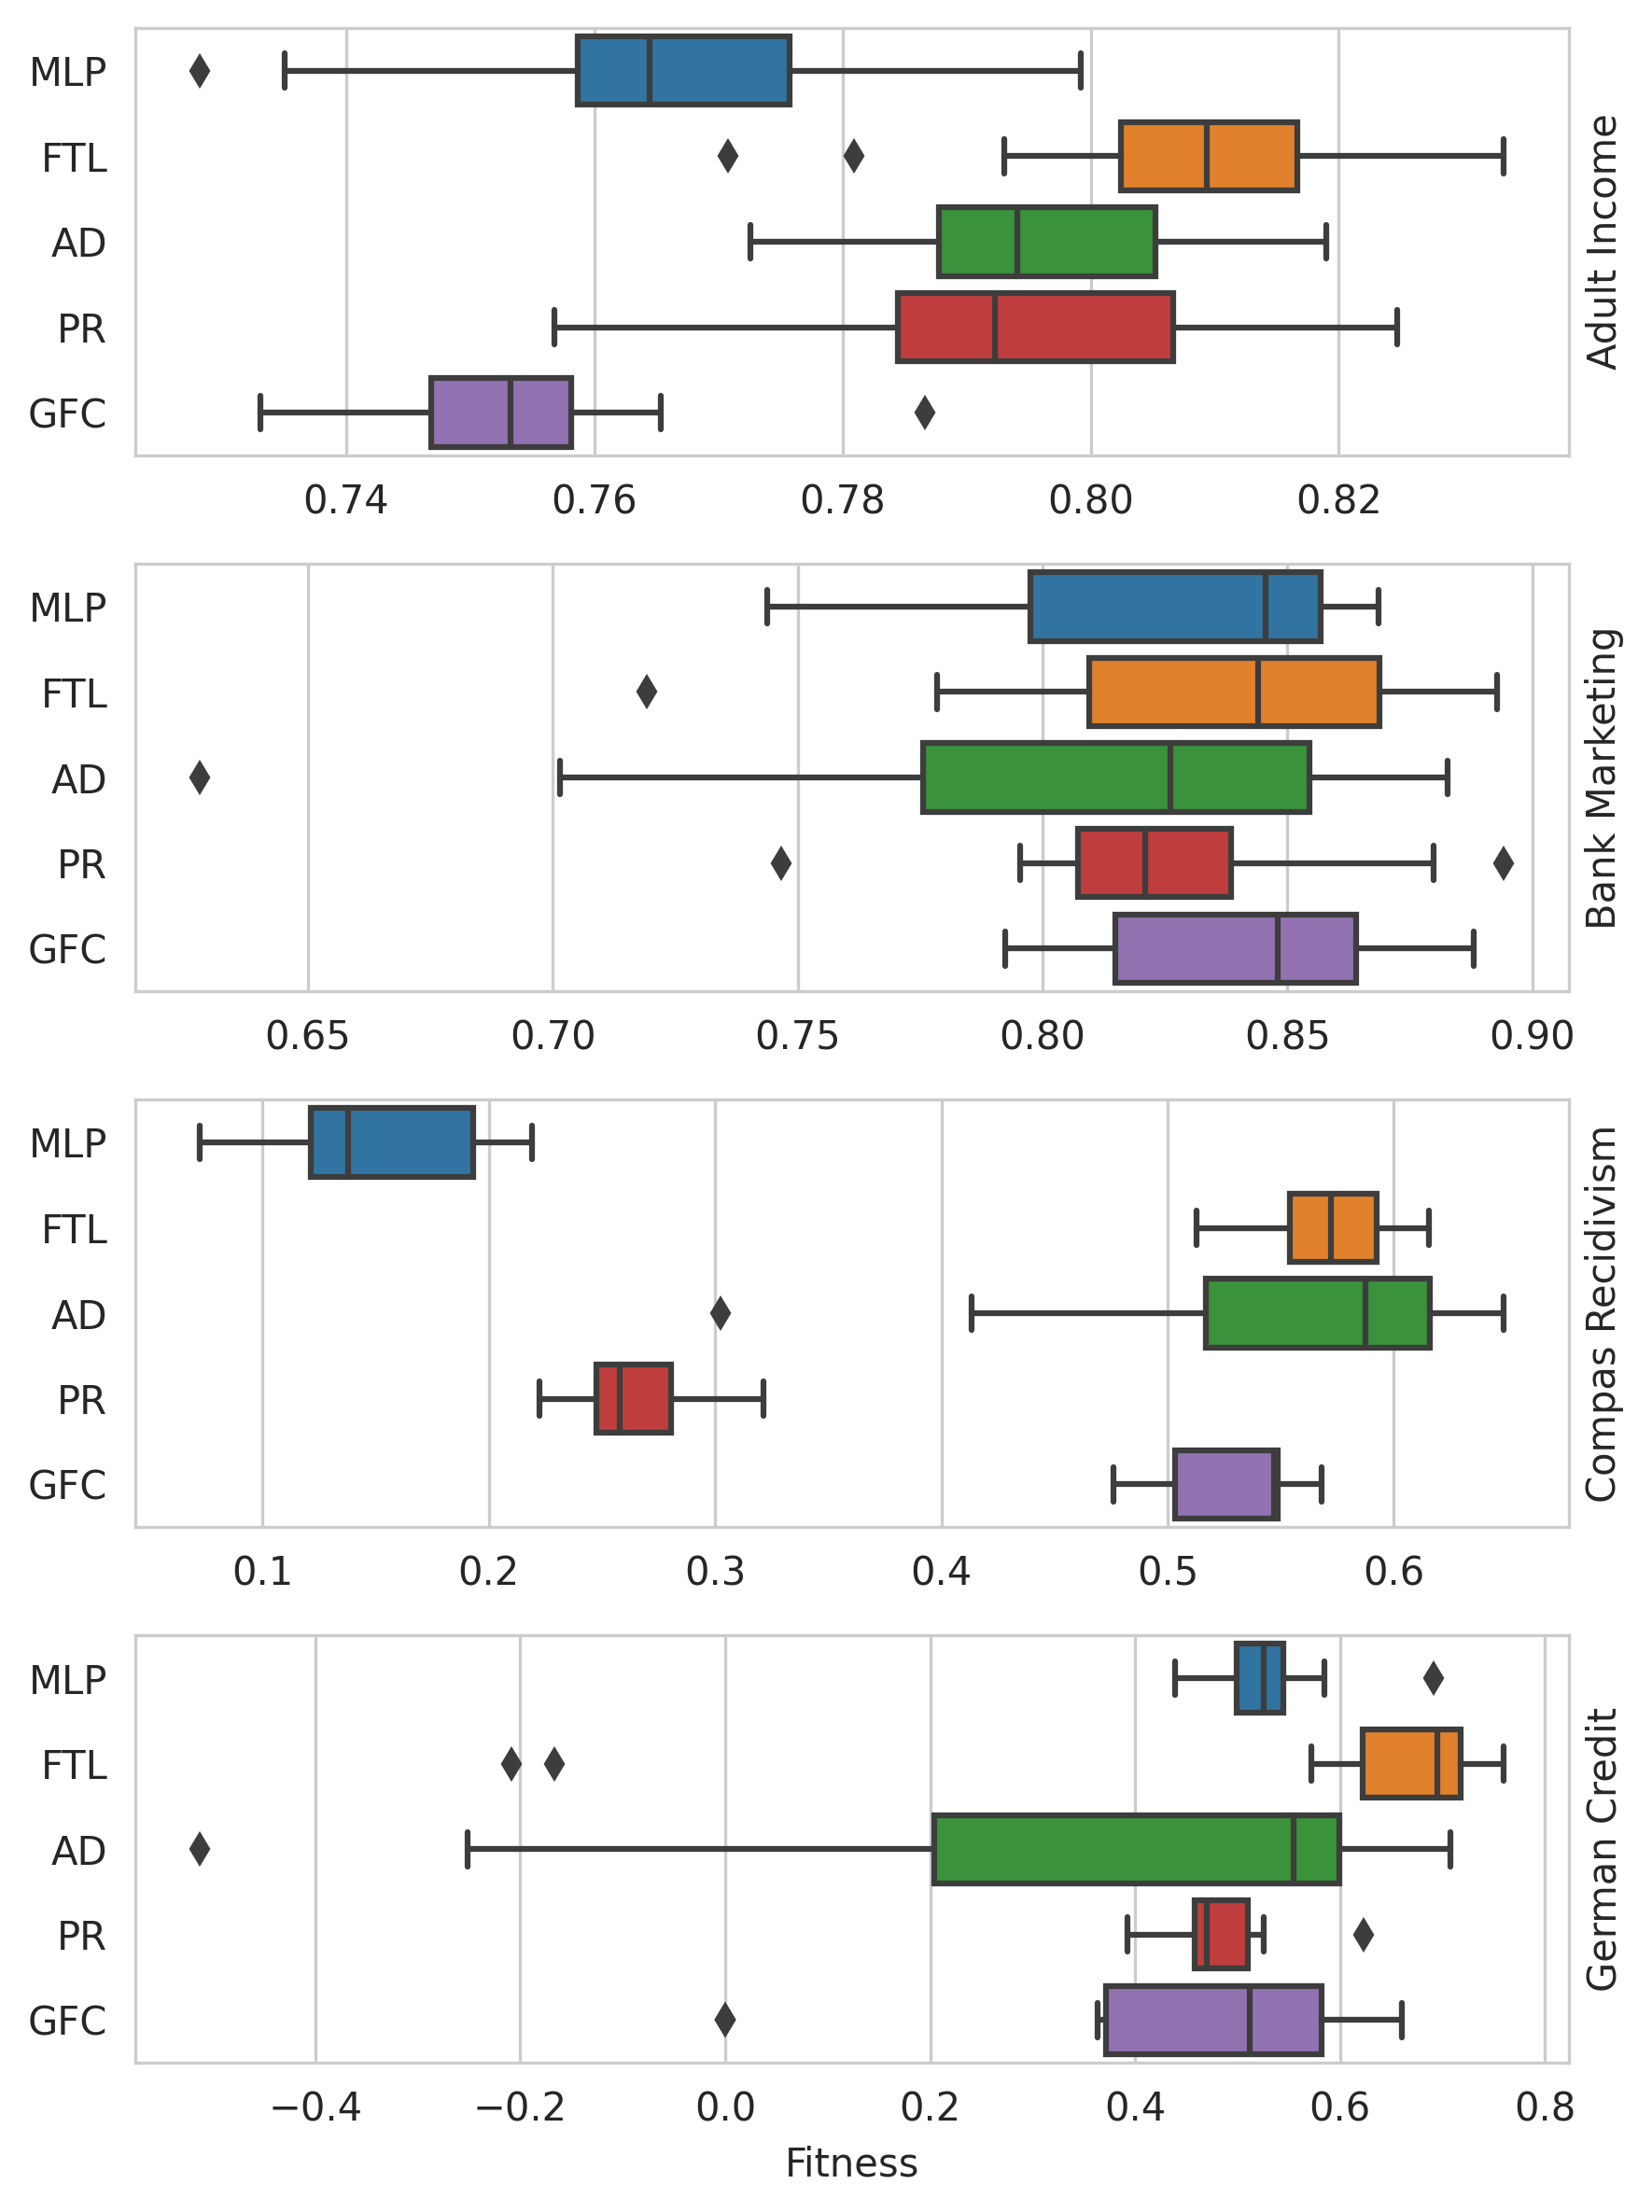

/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_576423/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


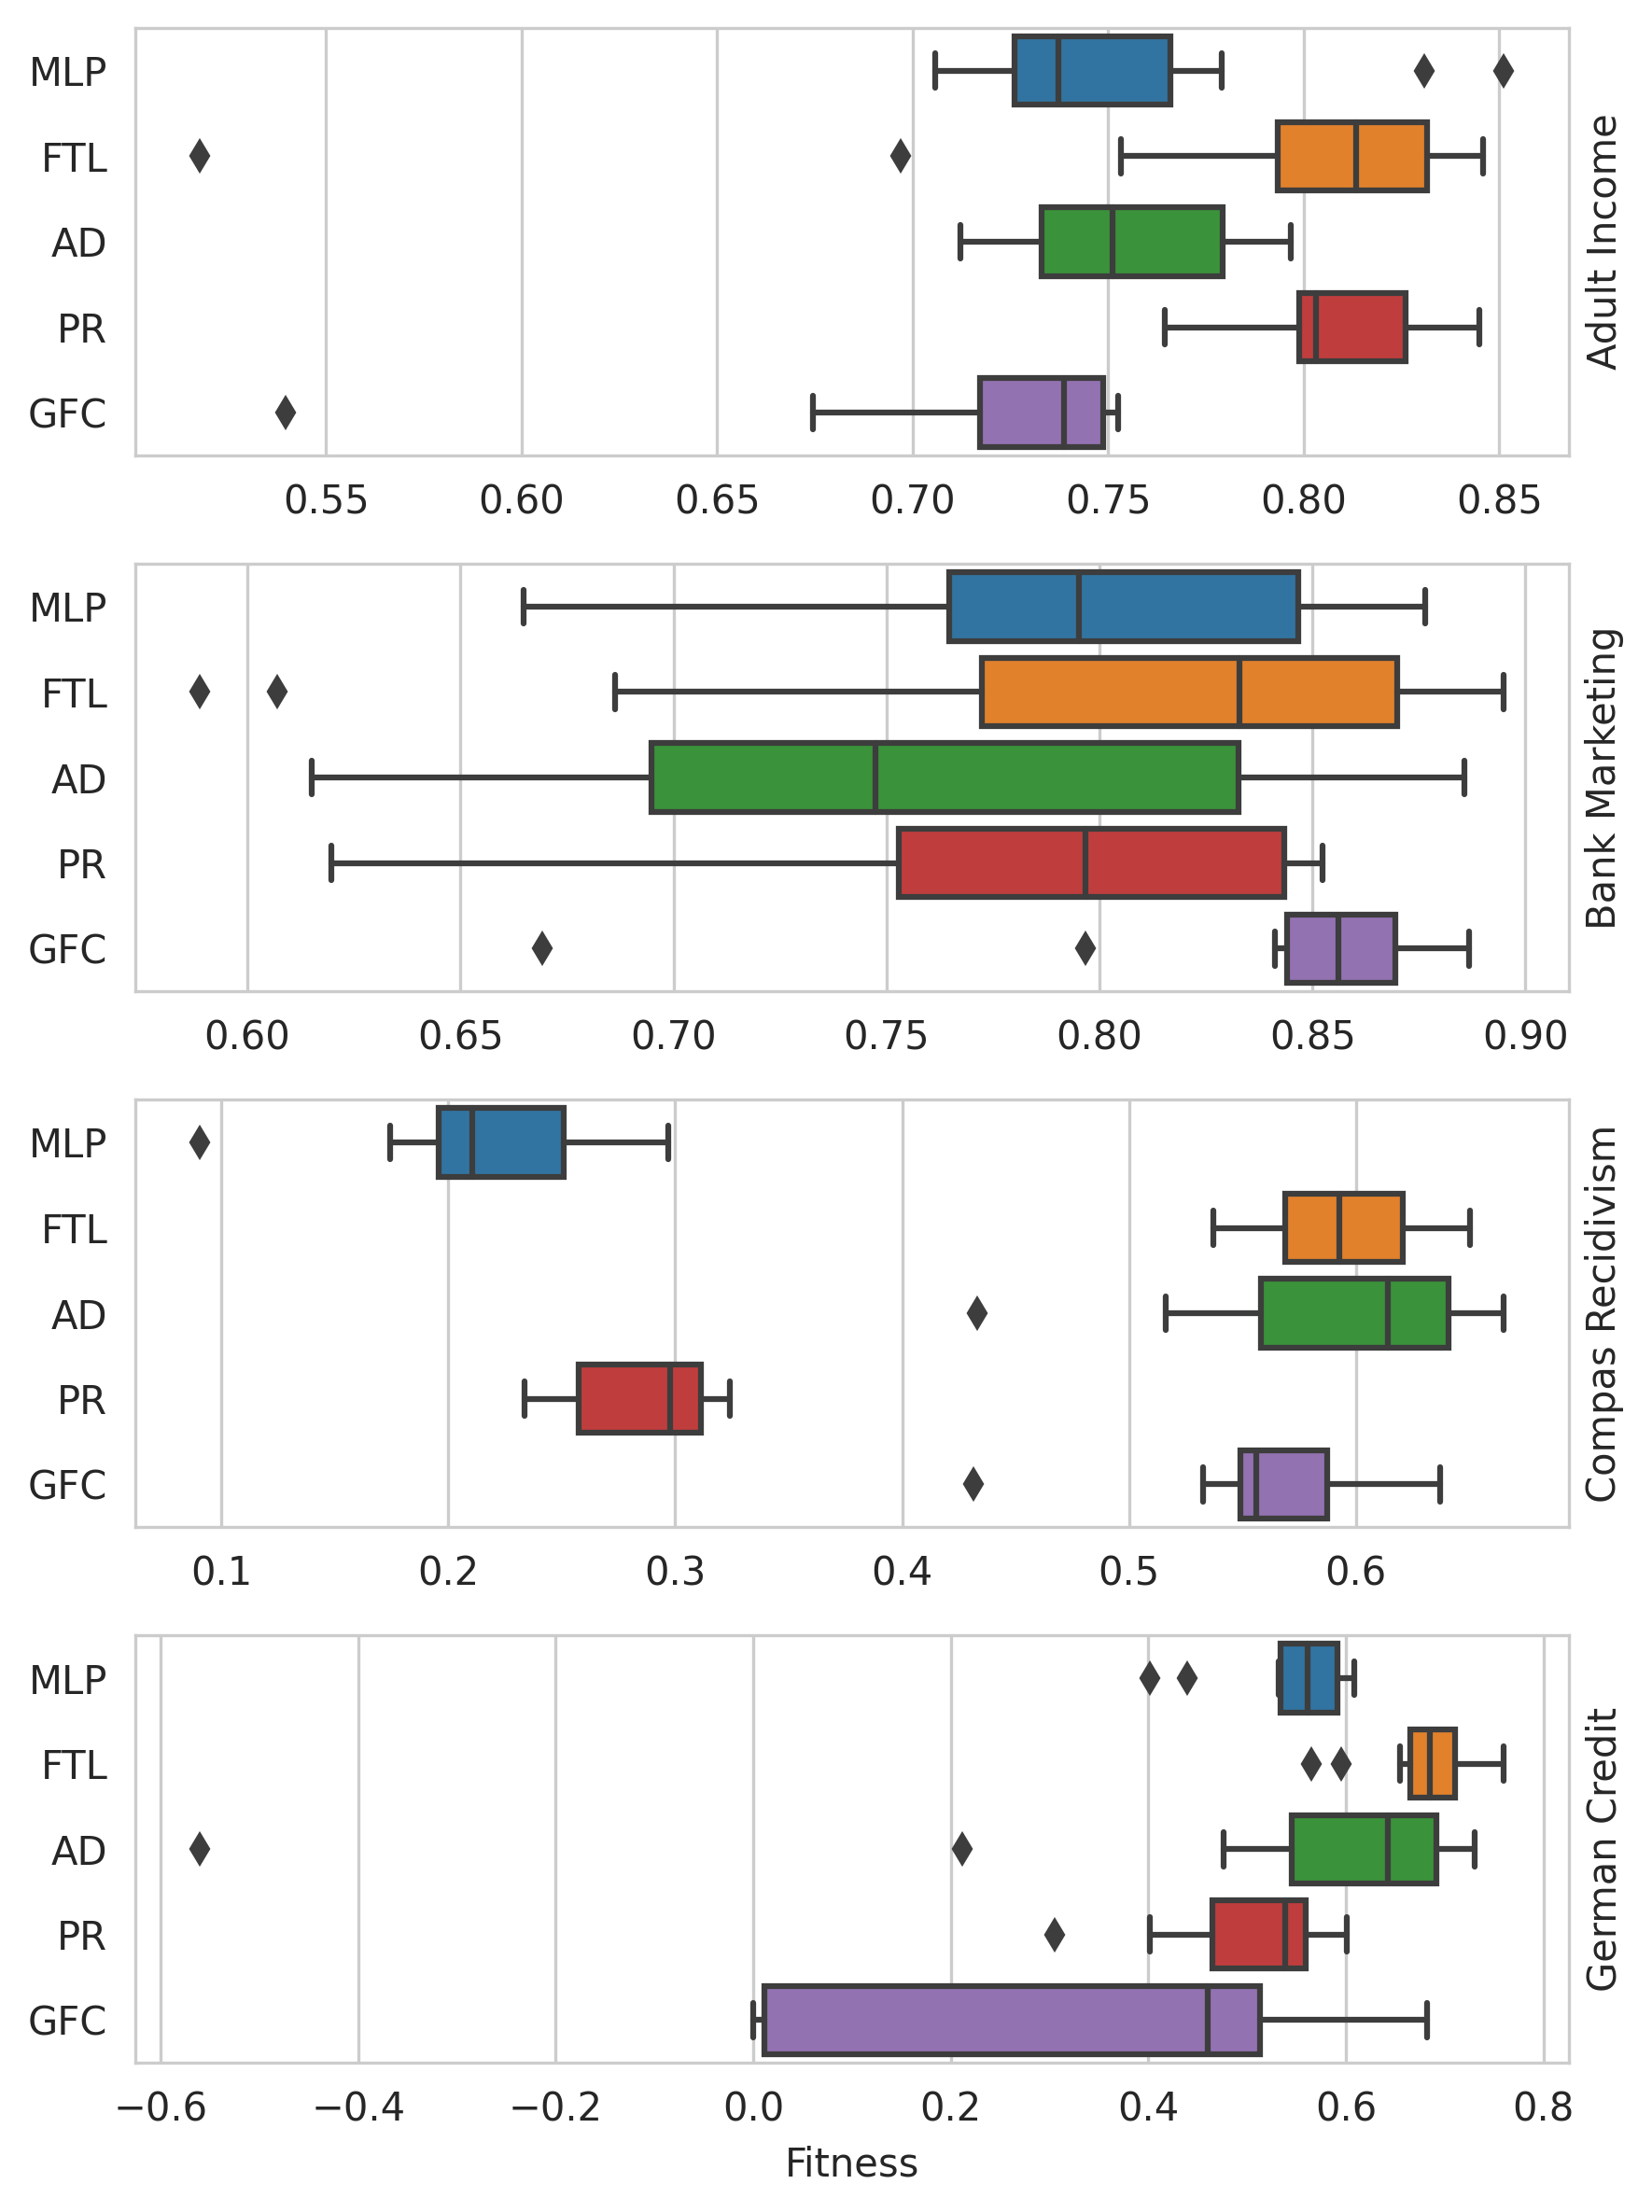

In [11]:
for fitness_rule in fitness_rules:
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6, 8))
    fig.subplots_adjust(hspace=0.7)

    for dataset, ax in zip(sorted(datasets), axes.flatten()):
        by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
        by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
        by_fitness_rule = by_fitness_rule.sort_values(by='method')

        boxplot = sns.boxplot(data=by_fitness_rule,
                    x='fitness', y='method', ax=ax)

        ax.set_ylabel(dataset)
        ax.yaxis.set_label_position("right")

        # Remove y-ticks from the second column
        if ax.get_subplotspec().colspan.start != 0:
            ax.set_yticks([])
            ax.set_ylabel('')

        # Remove x-ticks and labels from all but the last row
        if ax.get_subplotspec().rowspan.start != 3:
            ax.set_xlabel('')

    # Set x-labels for the last row
    axes[-1].set_xlabel('Fitness')

    plt.tight_layout()
    plt.savefig('plots/boxplot_%s.png' % fitness_rule)
    plt.show()